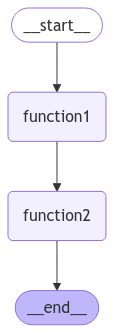

In [7]:
from langgraph.graph import Graph

def function1(word):
    return word+"has no of words"

def function2(word):
    return word+ "name is aman"



##------Intitalise Graph
graph=Graph()
###---Add Nodes
graph.add_node("function1", function1)
graph.add_node("function2",function2)

##----Add Edges (Means after func1 output funbction 2 willl be come input)
graph.add_edge("function1", "function2")

###---Entry Point to Graph
graph.set_entry_point("function1")

##------Exit Point to Graph
graph.set_finish_point("function2")

###----Compile Graph
app=graph.compile()

from IPython.display import display,Image
try:
    display(Image(app.get_graph().draw_mermaid_png()))
except Exception as e:
    print(e)

In [8]:
app.invoke("Hi Aman this side")

'Hi Aman this sidehas no of wordsname is aman'

## LLM Flow

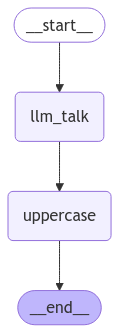

In [9]:
import os
from dotenv import load_dotenv
load_dotenv()
os.environ['SERPER_API_KEY']
os.environ['LANGSMITH_API_KEY']
os.environ['LANGSMITH_PROJECT']
os.environ['TAVILY_API_KEY']
from langchain_ollama import ChatOllama
def llm_talk(input):
    llm=ChatOllama(model="llama3.2",temperature=0)
    response=llm.invoke(input).content
    return response
def uppercase(input):
    input=input.upper()
    return input

graph2=Graph()
graph2.add_node("llm_talk", llm_talk)
graph2.add_node("uppercase", uppercase)
graph2.add_edge("llm_talk", "uppercase")
graph2.set_entry_point("llm_talk")
graph2.set_finish_point("uppercase")
app2=graph2.compile()
from IPython.display import display,Image
try:
    display(Image(app2.get_graph().draw_mermaid_png()))
except Exception as e:
    print(e)

In [10]:
app2.invoke("What is LLM?")

"LLM STANDS FOR LARGE LANGUAGE MODEL. IT'S A TYPE OF ARTIFICIAL INTELLIGENCE (AI) MODEL THAT'S DESIGNED TO PROCESS AND UNDERSTAND HUMAN LANGUAGE AT A MASSIVE SCALE.\n\nLARGE LANGUAGE MODELS ARE TYPICALLY TRAINED ON VAST AMOUNTS OF TEXT DATA, WHICH ENABLES THEM TO LEARN PATTERNS, RELATIONSHIPS, AND STRUCTURES WITHIN LANGUAGE. THIS TRAINING ALLOWS THE MODEL TO GENERATE HUMAN-LIKE TEXT, ANSWER QUESTIONS, SUMMARIZE CONTENT, AND EVEN ENGAGE IN CONVERSATION.\n\nSOME KEY CHARACTERISTICS OF LARGE LANGUAGE MODELS INCLUDE:\n\n1. **MASSIVE SCALE**: LLMS ARE TRAINED ON ENORMOUS AMOUNTS OF DATA, OFTEN IN THE TENS OR HUNDREDS OF BILLIONS OF PARAMETERS.\n2. **LANGUAGE UNDERSTANDING**: THEY'RE DESIGNED TO COMPREHEND THE NUANCES OF HUMAN LANGUAGE, INCLUDING GRAMMAR, SYNTAX, AND SEMANTICS.\n3. **TEXT GENERATION**: LLMS CAN PRODUCE COHERENT AND CONTEXTUALLY RELEVANT TEXT BASED ON THE INPUT THEY RECEIVE.\n\nLARGE LANGUAGE MODELS HAVE MANY APPLICATIONS, SUCH AS:\n\n1. **VIRTUAL ASSISTANTS**: CHATBOTS AND V

In [11]:
input="What is Machine Learning?"
for i in app2.stream(input):
    for key,value in i.items():
        print(f"Here is the output :{key}")
        print("________")
        print(value)
        print("\n")

Here is the output :llm_talk
________
Machine learning (ML) is a subset of artificial intelligence (AI) that involves training algorithms to make predictions or decisions based on data. The goal of ML is to enable machines to learn from experience, identify patterns, and improve their performance over time.

In traditional programming, a computer program is written to perform a specific task. In contrast, machine learning algorithms are designed to learn from data without being explicitly programmed. Instead, they use statistical models and algorithms to analyze the data and make predictions or decisions.

Machine learning involves several key steps:

1. **Data collection**: Gathering relevant data that can be used to train the algorithm.
2. **Data preprocessing**: Cleaning, transforming, and preparing the data for training.
3. **Model selection**: Choosing a suitable machine learning algorithm based on the problem type and data characteristics.
4. **Training**: Feeding the preprocesse